In [20]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

C:\Users\55839\AppData\Local\Temp/ipykernel_4048/2660633312.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [21]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


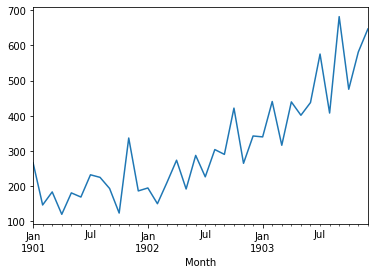

In [22]:
series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

In [34]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(series, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression:", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  3.0601420836411806
2. P-Value :  1.0
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression: 25
5. Critical Values :
	 1% :  -3.7238633119999998
	 5% :  -2.98648896
	 10% :  -2.6328004


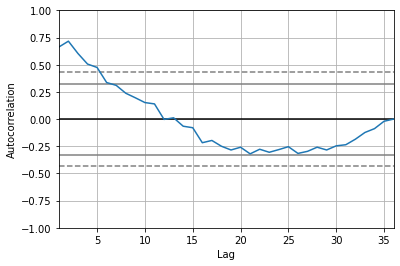

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

In [24]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Tue, 07 Dec 2021   AIC                            408.969
Time:                        09:47:03   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

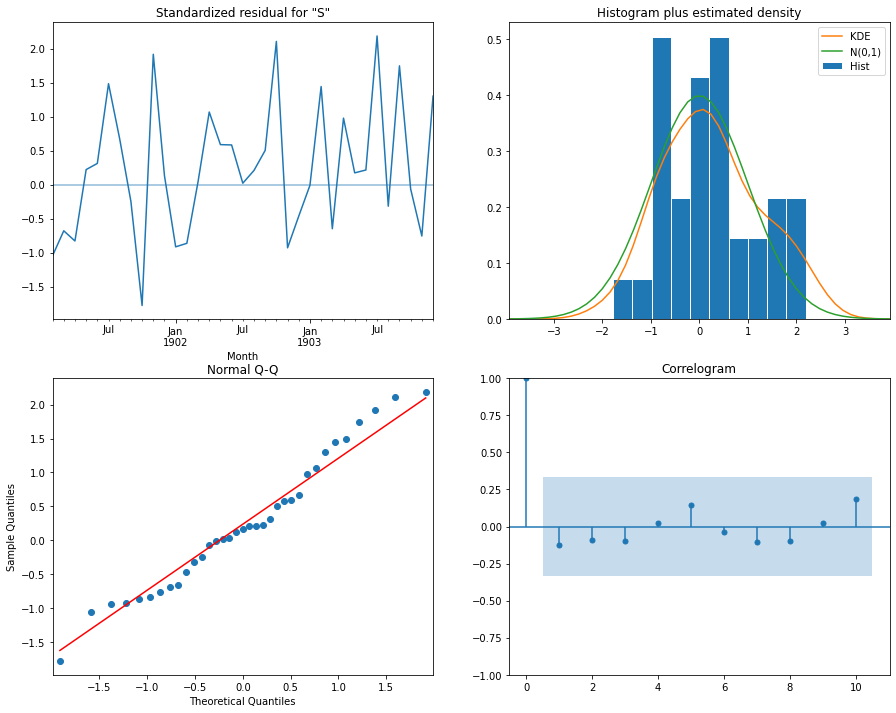

In [28]:
model_fit.plot_diagnostics(figsize=(15, 12))
pyplot.show()

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [30]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365673, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000


Test RMSE: 89.021


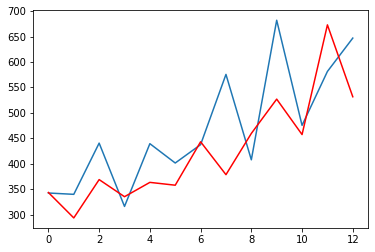

In [31]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [41]:
import pandas as pd 
df = pd.read_csv ('MaunaLoaDailyTemps.csv', index_col = 'DATE', parse_dates = True) 
df = df.dropna () 
print ('Forma dos dados', df.shape) 
df.head() 
df

Forma dos dados (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


<AxesSubplot:xlabel='DATE'>

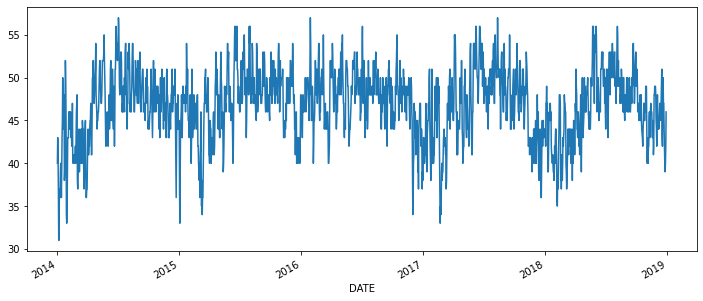

In [42]:
df ['AvgTemp']. plot (figsize = (12,5))

In [45]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['AvgTemp'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression:", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -6.554680125068778
2. P-Value :  8.675937480199557e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


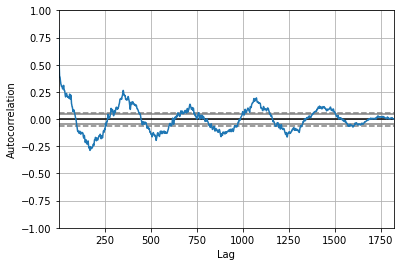

In [50]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['AvgTemp'])
pyplot.show()

In [48]:
from pmdarima import auto_arima 
stepwise_fit = auto_arima (df ['AvgTemp'], trace = True, 
suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.708, Time=2.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=1.51 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=1.91 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.332, Time=2.34 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.527, Time=2.45 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.188, Time=2.40 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.081, Time=2.90 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.161, Time=2.96 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.540, Time=3.24 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.723, Time=2.88 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [47]:
!pip install pmdarima

In [51]:
# fit model
model = ARIMA(df ['AvgTemp'], order=(1,0,5))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

C:\Users\55839\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\55839\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\55839\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                AvgTemp   No. Observations:                 1821
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4138.130
Date:                Tue, 07 Dec 2021   AIC                           8292.261
Time:                        12:13:42   BIC                           8336.318
Sample:                             0   HQIC                          8308.514
                               - 1821                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5285      0.758     61.403      0.000      45.043      48.014
ar.L1          0.9860      0.005    192.909      0.000       0.976       0.996
ma.L1         -0.1403      0.023     -6.125      0.0

In [52]:
print (df.shape) 
train = df.iloc [: - 30] 
test = df.iloc [-30:] 
print (train.shape, test.shape)

(1821, 5)
(1791, 5) (30, 5)


<AxesSubplot:xlabel='DATE'>

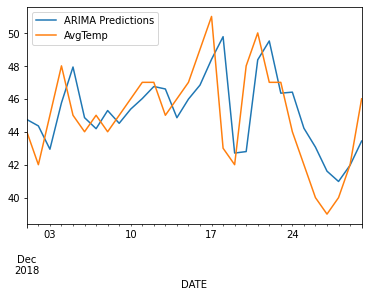

In [55]:
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)